# Библиотеки NumPy, Matpotlib, pandas

## Содержание лекции

* [NumPy](#NumPy)
  * [Создание массива](#Создание-массива)
  * [Получение среза](#Получение-среза)
  * [Изменение формы](#Изменение-формы)
  * [Операции и универсальные функции](#Операции-и-универсальные-функции)
* [Matplotlib](#Matplotlib)
  * [График](#График)
  * [Диаграмма разброса](#Диаграмма-разброса)
  * [Гистограмма](#Гистограмма)
* [pandas](#pandas)

## NumPy

Библиотека [NumPy](https://docs.scipy.org/doc/numpy/reference/) предоставляет типы и функции для вычислений с многомерными **массивами**. Массивом (англ. *array*) в программировании называется контейнер, хранящий последовательно друг за другом множество элементов. Из тех контейнеров, с которыми мы познакомились с вами в одной из предыдущих лекций, он больше всего похож на список. Основное же отличие заключается в том, что массив может хранить только значения фиксированного типа - того, который был указан при его создании. Благодаря этому ограничению можно эффективнее организовать хранение в памяти элементов массива, и добиться хорошей производительности операций, выполняющихся над всеми элементами.

Элементами многомерного массива являются другие массивы. Классический пример - матрица, представляющая собой массив строк, каждая из которых является массивом чисел.

Основным типом данных, предоставляемым библиотекой NumPy, является класс `ndarray`, который описывает многомерный массив. Перечислим наиболее важные атрибуты экземпляров этого класса:

1. `ndim` - количество измерений или, как их принято называть, осей. Например, обычная матрица имеет две оси (строки и столбцы). Оси идентифицируются своим порядковым номером, причем как и для индексов последовательностей, нумерация начинается с нуля (у матрицы строки - это нулевая ось, а столбцы - первая).
2. `shape` - форма массива. Это кортеж, который для каждой оси содержит число элементов в ней. Например, если у нас есть матрица размерности $N \times M$, то `shape` будет равно `(N, M)`.
3. `size` - общее количество элементов в многомерном массиве. По сути, представляет собой произведение всех элементов `shape`.
4. `dtype` - объект, содержащий информацию о типе данных элементов массива.

В дальнейших примерах нам часто будет требоваться выводить информацию о массиве на экран, поэтому мы определим простую функцию для этого:

In [1]:
import numpy as np

def print_array(a):
    print('ndim={}, shape={}, size={}, dtype={}'.format(a.ndim, a.shape, a.size, a.dtype))
    print(a)

### Создание массива

Существует несколько способов создать массив. Один из них - использовать функцию `array`.

In [2]:
# создаем одномерный массив
a = np.array([1, 2, 3])
print_array(a)

ndim=1, shape=(3,), size=3, dtype=int32
[1 2 3]


In [3]:
# создаем двумерный массив (матрицу)
a = np.array([[0.1, 0.2, 0.3, 0.4],
              [0.5, 0.6, 0.7, 0.8]])
print_array(a)

ndim=2, shape=(2, 4), size=8, dtype=float64
[[0.1 0.2 0.3 0.4]
 [0.5 0.6 0.7 0.8]]


Если при создании массива не указывается тип его элементов, то функция `array` в качестве него выбирает такой, чтобы можно было хранить любой элемент из перечисленных в ее вызове:

In [4]:
a = np.array([1, 2, 3])
print_array(a)

ndim=1, shape=(3,), size=3, dtype=int32
[1 2 3]


In [5]:
a = np.array([1, 2, 3.1])
print_array(a)

ndim=1, shape=(3,), size=3, dtype=float64
[1.  2.  3.1]


In [6]:
# явно указываем тип элементов
a = np.array([1, 2, 3], dtype=complex)
print_array(a)

ndim=1, shape=(3,), size=3, dtype=complex128
[1.+0.j 2.+0.j 3.+0.j]


Библиотека NumPy для элементов массива использует собственные типы данных, которые можно использовать так же, как соответсвующие встроенные. Особенность типов данных из NumPy в том, что для них четко определено количество бит, которое они занимаюь в памяти. Можно при создании массива указать и тип данных из библиотеки NumPy:

In [9]:
# используем 16битовые целые числа для хранения элементов
a = np.array([1, 2, 3], dtype=np.int16)
print_array(a)

ndim=1, shape=(3,), size=3, dtype=int16
[1 2 3]


Важно при этом понимать, какой диапазон значений можно хранить в том или ином типе (например, для int16 это $[-32768, 32767]$), потому что если впоследствии ваша программа присвоит элементу массива значение вне этого диапазона, оно будет сохранено неправильно!

Часто бывает так, что при создании массива известная его форма, но не значения элементов. В этом случае можно воспользоваться функциями `zeros`, `ones` или `empty`, которые заполняют созданный массив нулями, единицами или случайными значениями. В качестве первого аргумента все эти функции принимают кортеж, описывающий форму массива:

In [10]:
# создаем массив с 3мя осями;
# он представляет собой массив из двух массивов, каждый из
# которых содержит 3 массива, каждый из которых содержит 4 элемента
a = np.zeros((2, 3, 4))
print_array(a)

ndim=3, shape=(2, 3, 4), size=24, dtype=float64
[[[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]]


Обратите внимание, что по умолчанию для элементов массива используется тип `float64`. С помощью именованного параметра `dtype` функции `zeros` и других можно указать желаемый тип элементов.

Наконец, библиотека NumPy предоставляет функцию `arange` для генерации числовой последовательности, аналогичную встроенной функции `range`. Отличие заключается в том, что с помощью `arange` можно генерировать и последовательности чисел с плавающей точкой.

In [11]:
# целые из интервала [0, 10) с шагом 1
a = np.arange(10)
print_array(a)

ndim=1, shape=(10,), size=10, dtype=int32
[0 1 2 3 4 5 6 7 8 9]


In [12]:
# действительные из интервала [0.0, 1.0) c шагом 0.1
a = np.arange(0, 1, 0.1)
print_array(a)

ndim=1, shape=(10,), size=10, dtype=float64
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]


Заметим, что использовать функцию `arange` для получения действительных чисел, стоит осторожно, потому что размер полученного массива может отличаться от ожидаемого (это связано с неточным представлением [чисел с плавающей точкой](04_Data_Types.ipynb#Типы-с-плавающей-точкой)). Более безопасной с этой точки зрения является функция `linspace`, которая возвращает указанное количество равноудаленных друг от друга чисел из интервала:

In [13]:
# 10 равноудаленных друг от друга чисел из интервала [0, 0.9]
a = np.linspace(0, 0.9, 10)
print_array(a)

ndim=1, shape=(10,), size=10, dtype=float64
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]


### Получение среза

В случае одномерных массивов, получение срезов выполняется так же, как и для обычных последовательностей (списков, кортежей и т.д.). У многомерных массивов индексироваться может каждая ось. Если при этом отсутствует индекс для некоторой оси, то возвращаются все ее элементы. Срез объекта типа `ndarray` также имеет тип `ndarray`.

In [14]:
a_multi = np.array([[0, 1, 2],
                    [3, 4, 5],
                    [6, 7, 8],
                    [9, 10, 11]])

# выводи третий элемент второй строки (помните, что нумерация
# индексов начинается с нуля!)
print(a_multi[1, 2]) 

5


In [15]:
# получаем срез, состоящий из второй и третьей строки
result = a_multi[1:3]
print(type(result))
print(result)

<class 'numpy.ndarray'>
[[3 4 5]
 [6 7 8]]


In [16]:
# получаем срез, состоящий из первого и третьего элемента
# второй и четвертой строки, взятых в обратном порядке
print(a_multi[3:0:-2, 0:3:2])

[[ 9 11]
 [ 3  5]]


Тип `ndarray` является итерируемым, поэтому его можно использовать в цикле `for ... in`. Итерация при этом происходит по первой оси (например, в случае матриц - по строкам):

In [17]:
for row in a_multi:
    print(row)

[0 1 2]
[3 4 5]
[6 7 8]
[ 9 10 11]


Для итерации по элементам нужно использовать атрибут `flat`:

In [18]:
for item in a_multi.flat:
    print(item)

0
1
2
3
4
5
6
7
8
9
10
11


Обратите внимание, что при итерации по элементам вначале изменяется последняя ось, потом предпоследняя и т.д. Например, для трехмерного массива $N_1 \times N_2 \times N_3$ элементы извлекались бы в такой последовательности:

<pre>
a[0][0][0], ..., a[0][0][N3], a[0][1][0], ..., a[0][N2][N3], a[1][0][0], ..., a[N1][N2][N3]
</pre>

Поскольку `ndarray` относится к изменяемым типам данных, его элементы можно модифицировать:

In [19]:
a_multi[0, 0] = 100            # присваиваем первому элементу 100
a_multi[1] = 0                 # присваиваем всем элементам второй строки 0
a_multi[2] = np.arange(20, 23) # заменяем третью строку на строку [20, 21, 22]

print(a_multi)

[[100   1   2]
 [  0   0   0]
 [ 20  21  22]
 [  9  10  11]]


### Изменение формы

Класс `ndarray` предоставляет несколько методов и атрибутов, которые изменяют форму массива (количество и размер осей):

| <div align="left">Название</div> | Описание |
|----------------------------------|----------|
| <div align="left"><samp>reshape(shape, ...)</samp></div>                                                                      | Возвращает новый массив с формой <samp>shape</samp> и заполненный элементами текущего                                        |
| <div align="left"><samp>resize(shape, ...)</samp></div>                                                                       | Изменяет форму текущего массива на <samp>shape</samp>                                                                        |
| <div align="left"><samp>ravel(...)</samp></div>                                                                               | Возвращает "плоскую" версию массива с одним измерением                                                                       |

При заполнении нового массива, его первому элементу присваивается первый элемент старого, второму - второй и т.д. Причем порядок элементов соответствует тому, в котором они возвращались бы при итерации по всем элементам (по атрибуту `flat`).

Еще класс `ndarray` предоставляет метод `transpose` и атрибут `T`, которые позволяют получить транспонированную версию многомерного массива.

In [20]:
a1 = np.arange(10)
a2 = a1.reshape((2, 5))
a3 = a2.T
a4 = a3.ravel()

In [21]:
print_array(a1)

ndim=1, shape=(10,), size=10, dtype=int32
[0 1 2 3 4 5 6 7 8 9]


In [22]:
print_array(a2)

ndim=2, shape=(2, 5), size=10, dtype=int32
[[0 1 2 3 4]
 [5 6 7 8 9]]


In [23]:
print_array(a3)

ndim=2, shape=(5, 2), size=10, dtype=int32
[[0 5]
 [1 6]
 [2 7]
 [3 8]
 [4 9]]


In [24]:
print_array(a4)

ndim=1, shape=(10,), size=10, dtype=int32
[0 5 1 6 2 7 3 8 4 9]


Для объединения нескольких многомерных массивов в один класс `ndarray` предоставляет следующие функции:

| <div align="left">Название</div> | Описание |
|----------------------------------|----------|
| <div align="left"><samp>hstack(arrays_seq)</samp></div>                                                                       | Возвращает новый массив, каждая строка которого является конкатенацией строк массивов из последовательности <samp>arrays_seq</samp>                                                                                                        |
| <div align="left"><samp>vstack(arrays_seq)</samp></div>                                                                       | Возвращает новый массив, каждый столбец которого является конкатенацией столбцов массивов из последовательности <samp>arrays_seq</samp>                                                                                                        |

In [25]:
a1 = np.array([[1, 2, 3],
               [4, 5, 6],
               [7, 8, 9]])
a2 = np.array([[11, 12],
               [13, 14],
               [15, 16]])
a3 = np.array([[11, 12, 13],
               [14, 15, 16]])

In [26]:
print_array(np.hstack([a1, a2]))

ndim=2, shape=(3, 5), size=15, dtype=int32
[[ 1  2  3 11 12]
 [ 4  5  6 13 14]
 [ 7  8  9 15 16]]


In [27]:
print_array(np.vstack((a1, a3)))

ndim=2, shape=(5, 3), size=15, dtype=int32
[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [11 12 13]
 [14 15 16]]


Для разбиения многомерного массива на несколько меньших, используются функции `hsplit` и `vsplit`. Если им передается числовой аргумент, то он трактуется как количество массивов, на которое нужно разбить исходный, а если последовательность, то ее элементы трактуются как индексы, по которым нужно производить разбиение:

In [28]:
a = np.arange(18)
a.resize(2, 9)
print_array(a)

ndim=2, shape=(2, 9), size=18, dtype=int32
[[ 0  1  2  3  4  5  6  7  8]
 [ 9 10 11 12 13 14 15 16 17]]


In [29]:
arrays = np.hsplit(a, 3)

for array in arrays:
    print_array(array)

ndim=2, shape=(2, 3), size=6, dtype=int32
[[ 0  1  2]
 [ 9 10 11]]
ndim=2, shape=(2, 3), size=6, dtype=int32
[[ 3  4  5]
 [12 13 14]]
ndim=2, shape=(2, 3), size=6, dtype=int32
[[ 6  7  8]
 [15 16 17]]


In [30]:
arrays = np.vsplit(a.T, [2, 5, 8])

for array in arrays:
    print_array(array)

ndim=2, shape=(2, 2), size=4, dtype=int32
[[ 0  9]
 [ 1 10]]
ndim=2, shape=(3, 2), size=6, dtype=int32
[[ 2 11]
 [ 3 12]
 [ 4 13]]
ndim=2, shape=(3, 2), size=6, dtype=int32
[[ 5 14]
 [ 6 15]
 [ 7 16]]
ndim=2, shape=(1, 2), size=2, dtype=int32
[[ 8 17]]


### Операции и универсальные функции

Обычные операции в Python перегружены для массива и при выполнении действуют на все его элементы:

In [31]:
a = np.arange(12).reshape((3, 4))
print_array(a)

ndim=2, shape=(3, 4), size=12, dtype=int32
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


In [32]:
a += 1
print(a)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


Если в качестве операндов используются два массива одинаковой размерности, то операция выполняется для всех пар элементов на соответствующих позициях, например:

In [33]:
a1 = np.arange(7, 3, -1).reshape(2, 2)
a2 = np.arange(4).reshape(2, 2)

print_array(a1)
print_array(a2)

ndim=2, shape=(2, 2), size=4, dtype=int32
[[7 6]
 [5 4]]
ndim=2, shape=(2, 2), size=4, dtype=int32
[[0 1]
 [2 3]]


In [34]:
print(a1 * a2)
print(a1 ** a2)

[[ 0  6]
 [10 12]]
[[ 1  6]
 [25 64]]


Если вместо поэлементного умножения вы хотите матричное, то нужно воспользоваться функцией `dot`:

In [35]:
a1 = np.arange(6).reshape(2, 3)
a2 = np.arange(6).reshape(3, 2)

print_array(a1)
print_array(a2)
print_array(np.dot(a1, a2))

ndim=2, shape=(2, 3), size=6, dtype=int32
[[0 1 2]
 [3 4 5]]
ndim=2, shape=(3, 2), size=6, dtype=int32
[[0 1]
 [2 3]
 [4 5]]
ndim=2, shape=(2, 2), size=4, dtype=int32
[[10 13]
 [28 40]]


Методы `sum`, `max` и `min`, определенные для встроенных коллекций Python, также определены и для класса `ndarray`. По умолчанию они работают со всеми элементами массива, но можно также указать конкретную ось, вдоль которой производить вычисления.

In [36]:
a = np.arange(6).reshape(3, 2)
print_array(a)

ndim=2, shape=(3, 2), size=6, dtype=int32
[[0 1]
 [2 3]
 [4 5]]


In [37]:
print('max={}, min={}'.format(a.max(), a.min()))

# вычисляем по столбцам (axis=1), следовательно в результате
# получим сумму элементов для каждой строки
print(a.sum(axis=1)) 

max=5, min=0
[1 5 9]


В модуле `numpy.random` содержатся функции для генерации случайных массивов произвольной размерности. Например, функция `random` из этого модуля создает массив указанной формы и заполняет его случайными числами, равномерно распределенными в интервале $[0, 1)$:

In [38]:
a = np.random.random((3, 3))
print_array(a)

ndim=2, shape=(3, 3), size=9, dtype=float64
[[0.58631905 0.05127804 0.11899227]
 [0.441545   0.92873822 0.56905112]
 [0.99834455 0.30801818 0.98670992]]


В NumPy реализованы те же математические функции, что встречаются в стандартной библиотеке Python, однако они дополнительно умеют работать с массивами. В терминологии библиотеки NumPy эти функции назваются **универсальными**.

In [39]:
a = np.array([[1, 4, 9],
              [16, 25, 36]])
print(np.sqrt(a))

[[1. 2. 3.]
 [4. 5. 6.]]


In [40]:
a = np.array([0, 30, 45, 60, 90], dtype=float) # градусы
a *= np.pi / 180                               # преобразуем в радианы

# вычисляем синус для обычного числа и для массива
print(np.sin(a[3]))
print(np.sin(a))

0.8660254037844386
[0.         0.5        0.70710678 0.8660254  1.        ]


In [42]:
a = np.random.random(10)
print(a)

print('mean:',np.mean(a))     # вычисляем математической ожидание
print('variance:', np.var(a)) # вычисляет дисперсию

[0.39414892 0.69290907 0.45752525 0.86760323 0.67310272 0.37046983
 0.28611752 0.5529459  0.30555544 0.26226436]
mean: 0.4862642232874669
variance: 0.0373086402544582


## Matplotlib

Библиотека [Matplotlib](https://matplotlib.org/) используется для создания различных 2D и 3D графиков и диаграмм, среди которых:

* обычные графики (англ. *line plot*)
* диаграммы разброса/рассеивания (англ. *scatter plot*), характеризующие корреляцию между различными факторами
* гистограммы (англ. *histogram*)
* столбчатые диаграммы (англ. *bar chart*)
* круговые диаграммы (англ. *pie chart*)
* и другие

Функции и типы Matplotlib умеют работать с массивами NumPy, и более того, практически никогда не используются без них. В библиотеке Matplotlib релиазовано два интерфейса - один процедурный, другой объектно-ориентированный. Мы будем использовать процедурный, который реализован в модуле `matplotlib.pyplot`. Давайте импортируем модули, которые мы будем использовать в примерах в этом разделе.

In [46]:
import numpy as np
import matplotlib.pyplot as plt

### График

Обычный график создается с помощью функции `plot`. Основными ее парамерами являются две последовательности: в первой содержатся абсциссы точек, а во второй их ординаты. Функция `plot` строит график таким образом, чтобы он проходил через эти точки. Это означает, что чем сложнее форма графика, тем больше точек нужно передать в `plot`. Например, для построения прямой достаточно двух точек, но этого явно мало, чтобы правильно нарисовать параболу.

Кроме координат точек, функция `plot` имеет множество других параметров для настройки того, как график будет выглядеть. В наших примерах мы познакомим вас некоторыми из них, а полную информацию можно получить в [справочном руководстве](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot).

Давайте начнем с простого примера и создадим график прямой линии $2x + 1$:

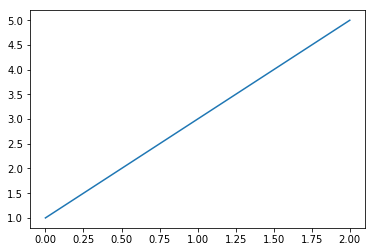

In [71]:
# двух точек достаточно для того, чтобы построить прямую

x = [0, 2] # ординаты
y = [1, 5] # абсциссы

plt.plot(x, y)

Заметим, что сама функция `plot` не рисует график, а просто инициализирует нужную информацию для этого. В среде Jupyter Notebook по умолчанию используется режим, при котором вывод графика на экран происходит автоматически при выполнении ячейки, но вообще говоря, за это отвечает отдельная функция `show`. Если вы при работе с Matplotlib столкнетесь с ситуаций, когда график не отображается, в первую очередь стоит попробовать вызвать эту функцию.

Давайте немного иначе настроим наш график, чтобы продемонстрировать некоторые возможности Matplotlib:

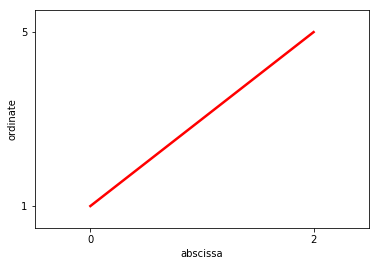

In [84]:
x = np.array([0, 2])
y = np.array([1, 5])

# задаем дополнительно цвет линии и толщину
plt.plot(x, y, color='red', linewidth=2.5)

# установим границы осей X и Y так, чтобы график не
# выглядел "зажатым" осями координат
plt.xlim(x.min() - 0.5, x.max() + 0.5)
plt.ylim(y.min() - 0.5, y.max() + 0.5)

# определим, какие точки будут отмечены на осях
x_ticks = np.linspace(x.min(), x.max(), 2)
y_ticks = np.linspace(y.min(), y.max(), 2)
plt.xticks(x_ticks)
plt.yticks(y_ticks)

# определим, как будут подписаны координатные оси
plt.xlabel('abscissa')
plt.ylabel('ordinate')

# рисуем график
plt.show()

Можно в одной системе координат отобразить сразу несколько графиков. Давайте попробуем вывести графики синуса и косинуса.

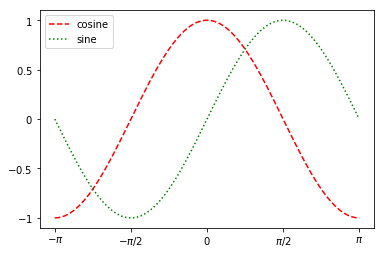

In [94]:
x = np.linspace(-np.pi, np.pi, 200)
cos_x = np.cos(x)
sin_x = np.sin(x)

# добавляем два графика, устанавливаем для них цвет, тип линии
# и название
plt.plot(x, cos_x, color='red', linestyle='dashed', label='cosine')
plt.plot(x, sin_x, color='green', linestyle='dotted', label='sine')

# добавляем легеду (информацию о том, какая линия что означает)
plt.legend()

# определяем, какие точки будут отмечены на осях
# можно в качестве значения указывать LaTex-формулу (используем
# это для того, чтобы вместо, например, 3.1415.. было написано pi)
x_ticks = np.array([-np.pi, -np.pi/2, 0, np.pi/2, np.pi])
x_ticks_name = [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$\pi/2$', r'$\pi$']
y_ticks = np.array([-1, -0.5, 0, 0.5, 1])
y_ticks_name = [r'$-1$', r'$-0.5$', r'$0$', r'$0.5$', r'$1$']

plt.xticks(x_ticks, x_ticks_name)
plt.yticks(y_ticks, y_ticks_name)

# рисуем график
plt.show()

Теперь давайте попробуем настроить координатные оси таким образом, чтобы центр графика находился в точке $(0, 0)$, как мы привыкли со школы. Для этого нам потребуется метод `gca`, возвращающий объект, который можно использовать для управления внешним видом координатных осей. На графике сверху есть четыре оси, образующих прямоугольник, внутри которого находяся графики. Нам нужно скрыть две из них (например, ту, что сверху и ту, что справа), а оставшиеся две поместить в точку $(0, 0)$:

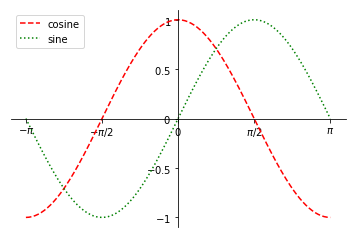

In [95]:
x = np.linspace(-np.pi, np.pi, 200)
cos_x = np.cos(x)
sin_x = np.sin(x)

# добавляем два графика, устанавливаем для них цвет, тип линии
# и название
plt.plot(x, cos_x, color='red', linestyle='dashed', label='cosine')
plt.plot(x, sin_x, color='green', linestyle='dotted', label='sine')

# добавляем легеду (информацию о том, какая линия что означает)
plt.legend()

# определяем, какие точки будут отмечены на осях
# можно в качестве значения указывать LaTex-формулу (используем
# это для того, чтобы вместо, например, 3.1415.. было написано pi)
x_ticks = np.array([-np.pi, -np.pi/2, 0, np.pi/2, np.pi])
x_ticks_name = [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$\pi/2$', r'$\pi$']
y_ticks = np.array([-1, -0.5, 0, 0.5, 1])
y_ticks_name = [r'$-1$', r'$-0.5$', r'$0$', r'$0.5$', r'$1$']

plt.xticks(x_ticks, x_ticks_name)
plt.yticks(y_ticks, y_ticks_name)

# меняем положение координатных осей
axes = plt.gca()

    # скрываем две оси
axes.spines['top'].set_color(None)
axes.spines['right'].set_color(None)

    # устаналиваем позицию левой и правой оси;
    # data' означает, что 0 - это координата, через которую должна проходить ось
axes.spines['left'].set_position(('data', 0))
axes.spines['bottom'].set_position(('data', 0))

# рисуем график
plt.show()

### Диаграмма разброса

Диаграмма разброса используется тогда, когда нужно оценить корреляцию между несколькими факторами. Для примера, в качестве одного фактора мы возьмем просто случайные, ничего не означающие данные. Второй фактор мы получим как сумму первого и некоторой случайной величины с достаточно большой дисперсией. Очевидно, что между этими двумя значениями мы должны увидеть положительную корреляцию - с ростом одного, увеличивается и второе. Проверим это на практике:

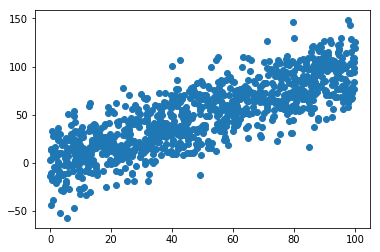

In [178]:
from random import uniform
from random import normalvariate

# используем генератор, чтобы создать массив случайных данных
x = np.array([uniform(0, 100) for i in range(1000)])
y = np.array([item + normalvariate(0, 20) for item in x])

# строим диаграмму разброса
plt.scatter(x, y)
plt.show()

Несмотря на то, что мы выбрали большое значение стандартного отклонения для случайной величины, с помощью которой мы оказывали влияние на первый фактор, положительная корреляция видна невооруженным глазом: с ростом $x$ возрастает $y$. Если стандартное отклонение продолжить увеличивать, то в определенный момент корреляция, очевидно, пропадет. Убедитесь в этом сами.

### Гистограмма

Гистограммы часто используются для того, чтобы сделать предположение о том, какому распределению подчиняется случайная выборка: по выборке строится гистограмма, а затем сравнивается, плотность распределения какого закона она напоминает больше всего. В качестве примере, рассмотрим выборку из нормального закона распределения, но вообразим, что нам это неизвестно:

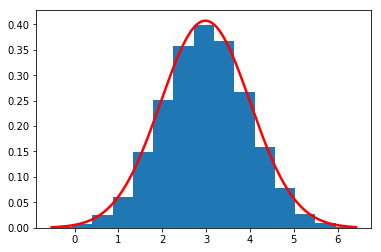

In [184]:
from math import sqrt
from random import normalvariate

def norm_density(x, mean, std):
    tmp1 = 1 / (std * np.sqrt(2 * np.pi))
    tmp2 = -((x - mean)**2 / 2 * std**2)
    return tmp1 * (np.e ** tmp2)


x = np.array([normalvariate(3, 1) for i in range(10000)])

# добавляем гистограмму на график (bins - количество столбиков в ней)
plt.hist(x, bins=15, density=True)

# добавим еще для наглядности график плотности распределени
x_mean = np.mean(x)
x_std = np.std(x) # стандартное отклонение
density_x = np.linspace(x.min(), x.max(), 200)
density_y = np.array([norm_density(item, x_mean, x_std) for item in density_x])
plt.plot(density_x, density_y, linewidth=2.5, color='red')

# рисуем графики
plt.show()

Как видите, гистограмма, построенная по выборке из "неизвестной" случайной величины, по форме похожа на плотность нормального распределения. Исходя из этого можно сделать вывод, что "неизвестная" случайная величина имеет закон распределения, близкий к нормальному.

В заключение дадим очень полезную [ссылку](https://matplotlib.org/tutorials/index.html) на раздел документации библиотеки Matplotlib, по которой можно найти большое количество примеров графиков вместе с исходным кодом, строящим их. Примеры оттуда позволяют увидеть весь спектр возможностей Matplotlib.

## pandas

- - -
[Предыдущая: Стандартная библиотека](10_Standard_Library.ipynb) |
[Содержание](00_Overview.ipynb#Содержание)